## project_nutrients_review_positive

In [80]:
import numpy as np

In [81]:
# project_nutrients_review_negative.csv
import pandas as pd
df_review_positive = pd.read_csv('../datasets/reviews_data/all_preprocess_positive.csv')

In [82]:
df_review_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89917 entries, 0 to 89916
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         89917 non-null  int64  
 1   product_name       89917 non-null  object 
 2   review_date        89917 non-null  object 
 3   review_content     89917 non-null  object 
 4   review_star        89917 non-null  float64
 5   review_writer      89917 non-null  object 
 6   tokenized_reviews  89917 non-null  object 
 7   replaced_review    87830 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.5+ MB


In [83]:
df_review_positive = df_review_positive.dropna()

### LDA 분석

##### 문장 벡터화

In [31]:
from gensim.corpora import Dictionary

In [32]:
type(df_review_positive['replaced_review'])

pandas.core.series.Series

In [33]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_review_positive['replaced_review'] = df_review_positive['replaced_review'].astype(str)

In [34]:
positive_review = df_review_positive['replaced_review'].apply(lambda x: x.split()).values

In [35]:
type(positive_review) 

numpy.ndarray

In [36]:
positive_review

array([list(['빨르다', '감마', '리놀렌산', '여성', '좋다', '다해', '초록색', '엄청', '비교', '해보다', '브리', '결정', '함량', '높다', '과정', '마음', '믿다', '구매', '좋다', '알약', '개봉시', '터지다', '주의', '껍질', '제거', '습관', '누르다', '터지다', '얼른', '양제', '실선', '좋다', '가위']),
       list(['상태', '깔끔하다', '좋다', '두번째', '구입', '월경', '증후군', '구입', '모르다', '영향', '다시', '주문', '알약', '크기', '크다', '편입', '판매', '답글', '판매', '안녕하다', '고객', '브리', '제품', '구매', '해주다', '대단하다', '감사하다', '브리', '제품', '고객', '건강', '많다', '도움', '좋다', '문의사항', '연락', '줄다', '감사하다', '브리', '올리다']),
       list(['상태', '깔끔하다', '좋다', '유트브', '구매', '피부', '염증', '좋다', '판매', '답글', '판매', '안녕하다', '고객', '브리', '제품', '구매', '해주다', '대단하다', '감사하다', '브리', '제품', '고객', '건강', '많다', '도움', '좋다', '문의사항', '연락', '줄다', '감사하다', '브리', '올리다']),
       ..., list(['빨르다', '뛰어나다']), list(['지인', '선물', '좋아하다']),
       list(['뛰어나다'])], dtype=object)

In [37]:
dictionary = Dictionary(positive_review)
dictionary

In [38]:
dictionary.doc2bow(positive_review[3])

[(5, 1),
 (13, 3),
 (24, 1),
 (30, 2),
 (31, 1),
 (32, 2),
 (34, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (47, 1),
 (49, 2),
 (51, 1),
 (54, 1),
 (55, 2),
 (57, 1),
 (61, 1)]

In [39]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in positive_review :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [40]:
df_review_positive['문장벡터화'] = corpus_list

In [41]:
df_review_positive.columns

Index(['Unnamed: 0', 'product_name', 'review_date', 'review_content',
       'review_star', 'review_writer', 'tokenized_reviews', 'replaced_review',
       '문장벡터화'],
      dtype='object')

##### 토픽 잡기
- review_positive.csv 토픽 분석
- 토픽 수 3

In [42]:
from gensim.models import LdaModel

In [72]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)

In [73]:
lda_model.print_topics(num_words=4)

[(0, '0.165*"빨르다" + 0.146*"좋다" + 0.126*"뛰어나다" + 0.060*"가격"'),
 (1, '0.039*"비타민" + 0.034*"좋다" + 0.018*"건강" + 0.016*"섭취"'),
 (2, '0.031*"제품" + 0.023*"복용" + 0.020*"구매" + 0.012*"좋다"')]

##### 최적에 토픽 단어 수

In [74]:
sentences = df_review_positive['replaced_review']
sentences

0        빨르다 감마 리놀렌산 여성 좋다 다해 초록색 엄청 비교 해보다 브리 결정 함량 높다...
1        상태 깔끔하다 좋다 두번째 구입 월경 증후군 구입 모르다 영향 다시 주문 알약 크기...
2        상태 깔끔하다 좋다 유트브 구매 피부 염증 좋다 판매 답글 판매 안녕하다 고객 브리...
3        상태 깔끔하다 크다 아직 모르다 판매 답글 판매 안녕하다 고객 브리 제품 구매 해주...
4        빨르다 뛰어나다 케이스 보내다 달라 확인 보내다 총알 알약 크기 작다 아니다 가로 ...
                               ...                        
85800              빨르다 뛰어나다 아르기닌 함량 높다 래서 피로 회복 생기다 상큼 스타일
85801                                             빨르다 뛰어나다
85802                                             빨르다 뛰어나다
85803                                           지인 선물 좋아하다
85804                                                 뛰어나다
Name: replaced_review, Length: 84186, dtype: object

In [46]:
type(sentences)

pandas.core.series.Series

In [47]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [48]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['빨르다',
  '감마',
  '리놀렌산',
  '여성',
  '좋다',
  '다해',
  '초록색',
  '엄청',
  '비교',
  '해보다',
  '브리',
  '결정',
  '함량',
  '높다',
  '과정',
  '마음',
  '믿다',
  '구매',
  '좋다',
  '알약',
  '개봉시',
  '터지다',
  '주의',
  '껍질',
  '제거',
  '습관',
  '누르다',
  '터지다',
  '얼른',
  '양제',
  '실선',
  '좋다',
  '가위'],
 ['상태',
  '깔끔하다',
  '좋다',
  '두번째',
  '구입',
  '월경',
  '증후군',
  '구입',
  '모르다',
  '영향',
  '다시',
  '주문',
  '알약',
  '크기',
  '크다',
  '편입',
  '판매',
  '답글',
  '판매',
  '안녕하다',
  '고객',
  '브리',
  '제품',
  '구매',
  '해주다',
  '대단하다',
  '감사하다',
  '브리',
  '제품',
  '고객',
  '건강',
  '많다',
  '도움',
  '좋다',
  '문의사항',
  '연락',
  '줄다',
  '감사하다',
  '브리',
  '올리다'],
 ['상태',
  '깔끔하다',
  '좋다',
  '유트브',
  '구매',
  '피부',
  '염증',
  '좋다',
  '판매',
  '답글',
  '판매',
  '안녕하다',
  '고객',
  '브리',
  '제품',
  '구매',
  '해주다',
  '대단하다',
  '감사하다',
  '브리',
  '제품',
  '고객',
  '건강',
  '많다',
  '도움',
  '좋다',
  '문의사항',
  '연락',
  '줄다',
  '감사하다',
  '브리',
  '올리다'],
 ['상태',
  '깔끔하다',
  '크다',
  '아직',
  '모르다',
  '판매',
  '답글',
  '판매',
  '안녕하다',
  '고객',
  '브리',
  '제품',
  '구매',
  '해주다'

In [49]:
preprocessed_sentences = morphs_list

In [50]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [51]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.562998363474713

In [52]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-6.671893261705576

In [54]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

In [55]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.535545,-6.537525
1,0.517358,-6.550883
2,0.547851,-6.584733
3,0.565825,-6.658014
4,0.595021,-6.702643
5,0.591438,-6.739847
6,0.552780,-6.800354
7,0.572152,-6.863379
8,0.572980,-7.018835


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

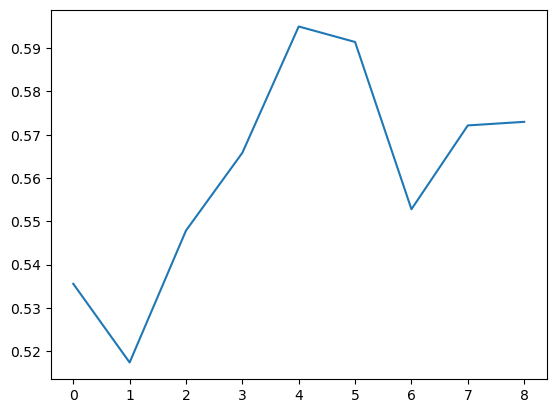

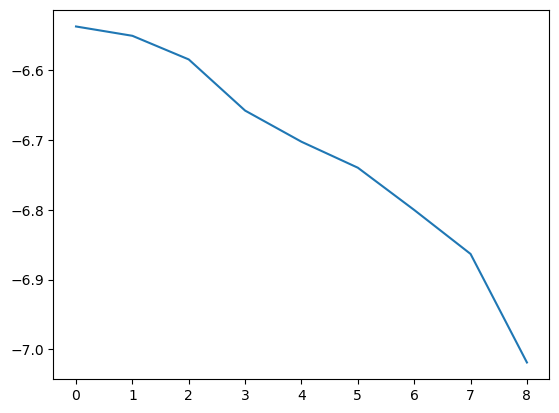

In [57]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [58]:
# %pip install pyLDAvis

In [60]:
# word_count_in_corpus = sum(len(doc) for doc in corpus_list)
# print("corpus_list의 전체 단어 수:", word_count_in_corpus)

corpus_list의 전체 단어 수: 880757


In [61]:
# if word_count_in_dictionary == word_count_in_corpus:
#     print("dictionary와 corpus_list의 단어 수가 일치합니다.")
# else:
#     print("주의: dictionary와 corpus_list의 단어 수가 일치하지 않습니다.")

주의: dictionary와 corpus_list의 단어 수가 일치하지 않습니다.


### LDA 시각화(review_negative)

In [75]:
import pyLDAvis.gensim_models

In [76]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [77]:
pyLDAvis.display(result_visualized)

In [78]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, '../project_nutrients_review_positive_result_visualized.html')